In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df=pd.read_csv('Resume.csv')

In [3]:
df.sample(5)

,ID,Resume_str,Resume_html,Category
95,28640735,DIRECTOR OF HR Executive Pr...,"<div class=""fontsize fontface vmargins hmargin...",HR
968,29142288,SALES ASSOCIATE Professional Su...,"<div class=""fontsize fontface vmargins hmargin...",AGRICULTURE
1923,23387174,GENERAL ACCOUNTANT Summary ...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT
689,26125407,HEALTHCARE ADMINISTRATION INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE
656,12632728,,"<div class=""fontsize fontface vmargins hmargin...",BUSINESS-DEVELOPMENT


In [4]:
df.shape

(2484, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [6]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [9]:
df['Category'].nunique()

24

In [10]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

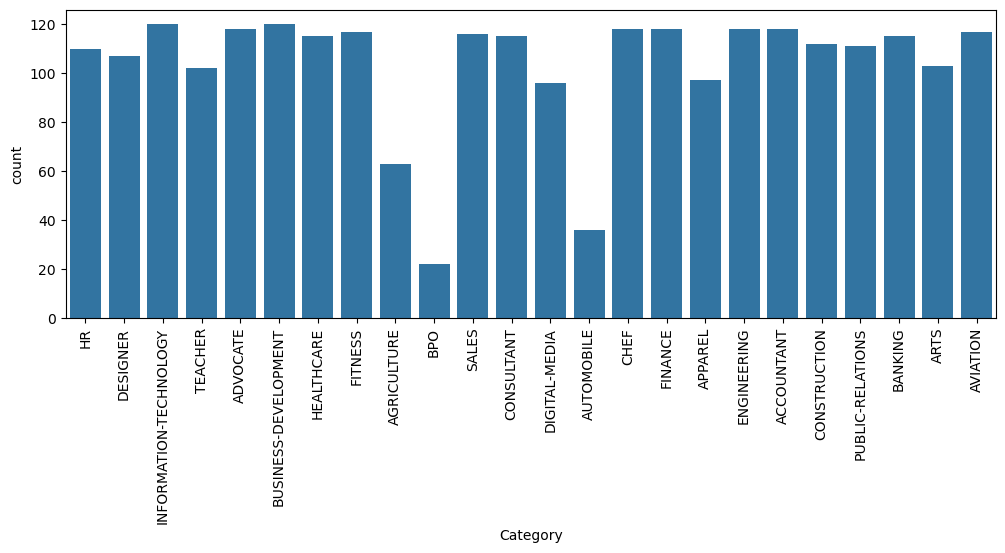

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.show()

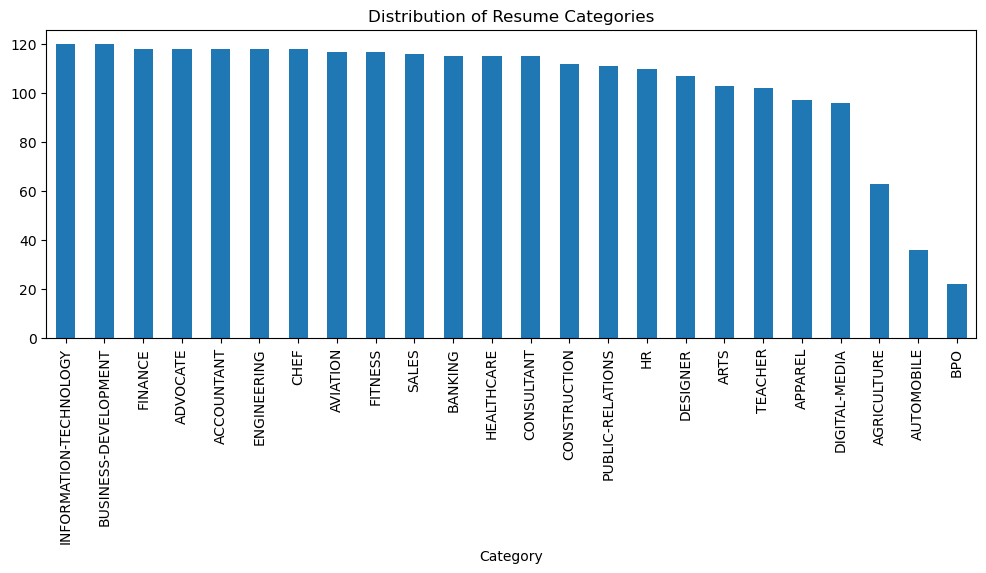

In [12]:
df['Category'].value_counts().plot(kind='bar',figsize=(12,4))
plt.title('Distribution of Resume Categories')
plt.xticks(rotation=90)
plt.show()

(array([], dtype=float64), [])

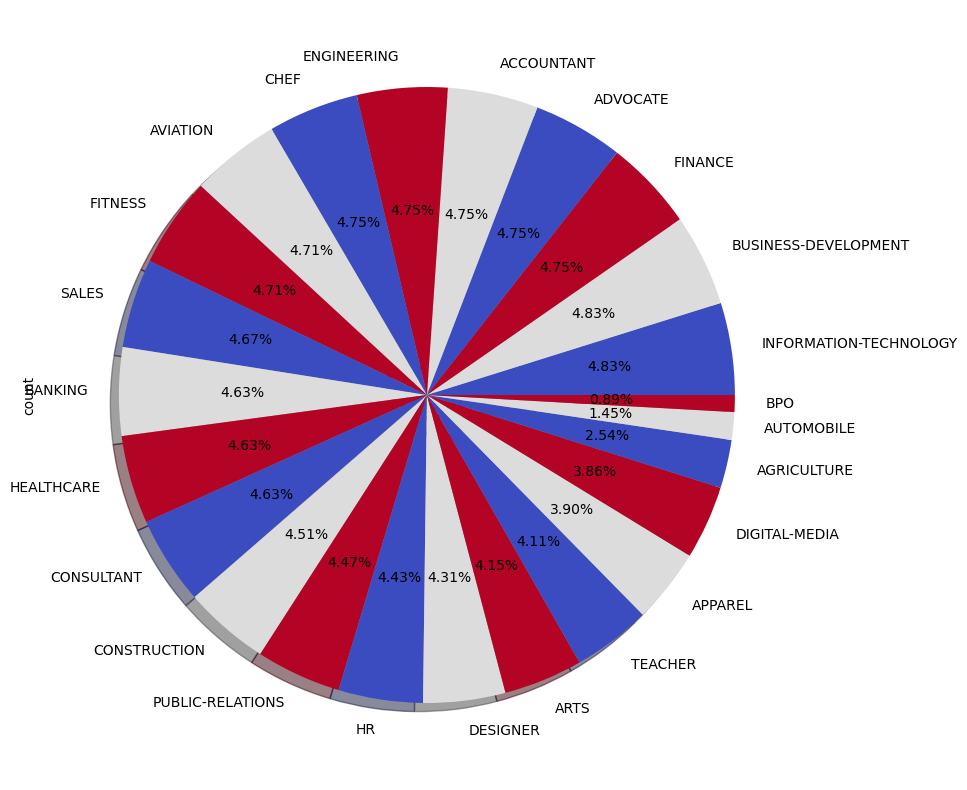

In [13]:
df['Category'].value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(15,10),shadow=True,colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.xticks(rotation=90)

## Preprocessing and Encoding:

In [15]:
df['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [16]:
import re 
import string
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

In [17]:
df['Resume_str']=df['Resume_str'].apply(clean_text)

In [18]:
df['Resume_str'][0]

' hr administrator marketing associate hr administrator summary dedicated customer service manager with 15 years of experience in hospitality and customer service management respected builder and leader of customer focused teams strives to instill a shared enthusiastic commitment to customer service highlights focused on customer satisfaction team management marketing savvy conflict resolution techniques training and development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified by ihg in customer loyalty and marketing by segment hilton worldwide general manager training certification accomplished trainer for cross server hospitality systems such as hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses and seminars in customer service sales strategies inventory control loss prevention safety time management leadership and performance assessment experience hr administrator marketi

Workflow:
    1. Fit the label encoder on the Category column to learn the unique categories.    2. 
Transform the Category column into encoded numerical values.    3. 
Fit the TF-IDF vectorizer on the Resume column to learn the vocabulary and IDF (Inverse Document Frequency) of the words    4. .
Transform the Resume texts into a sparse matrix of TF-IDF features.

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [21]:
df['Category'].unique()

array([19, 13, 20, 23,  1,  9, 18, 17,  2,  8, 22, 12, 14,  5, 10, 16,  3,
       15,  0, 11, 21,  7,  4,  6])

In [22]:
df['Category'].value_counts()

Category
20    120
9     120
16    118
1     118
0     118
15    118
10    118
6     117
17    117
22    116
7     115
18    115
12    115
11    112
21    111
19    110
13    107
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: count, dtype: int64

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf=TfidfVectorizer(max_features=5000,stop_words='english')
tfidf.fit(df['Resume_str'])
requredTaxt=tfidf.transform(df['Resume_str'])

In [25]:
requredTaxt

<2484x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 702597 stored elements in Compressed Sparse Row format>

## Train Test Data and Modeling

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(requredTaxt,df['Category'], test_size=0.3, random_state=42, stratify=df['Category'])
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (1738, 5000)
Validation set size: (373, 5000)
Test set size: (373, 5000)


In [28]:
X_train.shape

(1738, 5000)

In [29]:
X_test.shape

(373, 5000)

In [30]:
accuracy_lis=[] #
model_lis=[]

# Training and Evaluating Multiple Machine Learning Models

In order to build a robust NLP-based resume classification system, it's beneficial to train and compare the performance of multiple machine learning models. This approach allows us to select the best model based on performance metrics such as accuracy.

Models Considered:

1. K-Nearest Neighbors (KNN) Classifier: Already implemented, a non-parametric, instance-based learning algorithm.
2. Logistic Regression: A linear model for classification that predicts the probability of a categorical dependent variable.
3. Random Forest Classifier: An ensemble learning method that operates by constructing a multitude of decision trees at training time and       outputting the class that is the mode of the classes of the individual trees.
4. Multinomial Naive Bayes: A probabilistic learning method that is particularly suited for text classification tasks.

Evaluation Metric:

All models are evaluated using the accuracy score, which is the proportion of correct predictions over all predictions made.

In [37]:
from sklearn.naive_bayes import MultinomialNB
ml= MultinomialNB()
ml.fit(X_train, y_train)

MultinomialNB()

In [38]:
y_val_pred = ml.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.5254691689008043


In [39]:
y_test_pred = ml.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_test_pred))

print("precision:",precision_score(y_test, y_test_pred, average='weighted',zero_division=0))
print("recall:",recall_score(y_test, y_test_pred, average='weighted'))
print("f1:",f1_score(y_test, y_test_pred, average='weighted'))
print(classification_report(y_test, y_test_pred,zero_division=0))

model_lis.append("MultinomialNB")
accuracy_lis.append(accuracy_score(y_val, y_val_pred)*100)

Accuracy: 0.5844504021447721
precision: 0.5979191953440578
recall: 0.5844504021447721
f1: 0.5481643660524536
              precision    recall  f1-score   support

           0       0.47      0.94      0.63        17
           1       0.53      0.59      0.56        17
           2       1.00      0.20      0.33        10
           3       0.60      0.21      0.32        14
           4       0.67      0.12      0.21        16
           5       0.00      0.00      0.00         5
           6       0.79      0.61      0.69        18
           7       0.85      0.61      0.71        18
           8       0.00      0.00      0.00         4
           9       0.44      0.94      0.60        18
          10       0.74      0.82      0.78        17
          11       0.71      0.71      0.71        17
          12       0.00      0.00      0.00        18
          13       0.67      0.50      0.57        16
          14       0.83      0.33      0.48        15
          15       0.73   

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
y_val_pred = LR.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.6327077747989276


In [42]:
y_test_pred = LR.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_test_pred))

print("precision:",precision_score(y_test, y_test_pred, average='weighted',zero_division=0))
print("recall:",recall_score(y_test, y_test_pred, average='weighted'))
print("f1:",f1_score(y_test, y_test_pred, average='weighted'))
print(classification_report(y_test, y_test_pred,zero_division=0))

model_lis.append("LogisticRegression")
accuracy_lis.append(accuracy_score(y_val, y_val_pred)*100)

Accuracy: 0.67828418230563
precision: 0.6755367397067586
recall: 0.67828418230563
f1: 0.651622224612996
              precision    recall  f1-score   support

           0       0.53      0.94      0.68        17
           1       0.59      0.76      0.67        17
           2       1.00      0.20      0.33        10
           3       0.50      0.29      0.36        14
           4       0.50      0.25      0.33        16
           5       0.00      0.00      0.00         5
           6       0.83      0.83      0.83        18
           7       0.72      0.72      0.72        18
           8       0.00      0.00      0.00         4
           9       0.59      0.94      0.72        18
          10       0.82      0.82      0.82        17
          11       0.93      0.82      0.88        17
          12       0.50      0.17      0.25        18
          13       0.69      0.69      0.69        16
          14       0.67      0.53      0.59        15
          15       0.75      0.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
y_val_pred = clf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.5335120643431636


In [45]:
y_test_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_test_pred))

print("precision:",precision_score(y_test, y_test_pred, average='weighted',zero_division=0))
print("recall:",recall_score(y_test, y_test_pred, average='weighted'))
print("f1:",f1_score(y_test, y_test_pred, average='weighted'))
print(classification_report(y_test, y_test_pred,zero_division=0))

model_lis.append("KNeighborsClassifier")
accuracy_lis.append(accuracy_score(y_val, y_val_pred)*100)

Accuracy: 0.5683646112600537
precision: 0.5438822125134182
recall: 0.5683646112600537
f1: 0.545767972212611
              precision    recall  f1-score   support

           0       0.50      0.94      0.65        17
           1       0.37      0.41      0.39        17
           2       0.40      0.20      0.27        10
           3       0.10      0.07      0.08        14
           4       0.35      0.38      0.36        16
           5       0.00      0.00      0.00         5
           6       0.85      0.61      0.71        18
           7       0.67      0.56      0.61        18
           8       0.00      0.00      0.00         4
           9       0.52      0.67      0.59        18
          10       0.79      0.88      0.83        17
          11       0.81      0.76      0.79        17
          12       0.00      0.00      0.00        18
          13       0.58      0.69      0.63        16
          14       0.42      0.53      0.47        15
          15       0.65    

In [46]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_val_pred = RFC.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.7024128686327078


In [48]:
y_test_pred = RFC.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_test_pred))

print("precision:",precision_score(y_test, y_test_pred, average='weighted',zero_division=0))
print("recall:",recall_score(y_test, y_test_pred, average='weighted'))
print("f1:",f1_score(y_test, y_test_pred, average='weighted'))
print(classification_report(y_test, y_test_pred,zero_division=0))

model_lis.append("RandomForestClassifier")
accuracy_lis.append(accuracy_score(y_val, y_val_pred)*100)

Accuracy: 0.7158176943699732
precision: 0.705153887971381
recall: 0.7158176943699732
f1: 0.6924314553413636
              precision    recall  f1-score   support

           0       0.53      0.94      0.68        17
           1       0.82      0.82      0.82        17
           2       1.00      0.40      0.57        10
           3       0.62      0.36      0.45        14
           4       0.40      0.12      0.19        16
           5       0.00      0.00      0.00         5
           6       0.89      0.89      0.89        18
           7       0.79      0.61      0.69        18
           8       0.00      0.00      0.00         4
           9       0.62      0.83      0.71        18
          10       0.80      0.94      0.86        17
          11       0.93      0.82      0.88        17
          12       0.69      0.50      0.58        18
          13       0.83      0.94      0.88        16
          14       0.58      0.47      0.52        15
          15       0.74    

In [49]:
print(confusion_matrix(y_test,y_test_pred))

[[16  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 1  0  4  0  0  0  0  0  0  0  0  0  2  0  0  0  1  0  0  0  0  0  2  0]
 [ 2  0  0  5  1  0  0  0  0  3  0  0  0  1  0  0  0  0  0  1  0  1  0  0]
 [ 0  1  0  0  2  0  2  0  0  0  1  0  0  0  1  0  0  0  1  0  2  3  0  3]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  2  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0 11  0  2  0  0  0  0  0  0  1  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  1  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0  0  0 14  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 3  1  0  0  0  0  0  0  0  0  0  0  9  0  1  0  0  0  0  0  3  1  0  0]
 [ 0  0  0  0  0  0  0  0

# Summarization of the models and accuracy

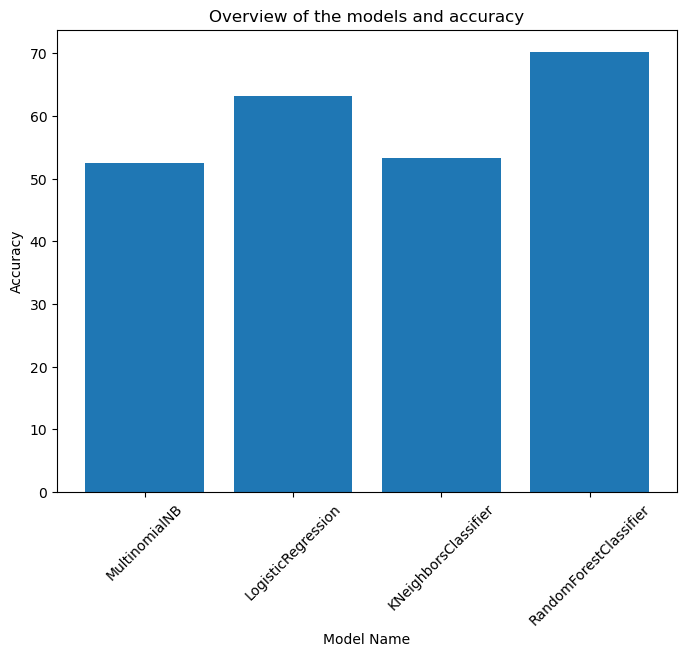

In [51]:
accuracy_data = pd.DataFrame({'model': model_lis, 'accuracy': accuracy_lis})

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(accuracy_data['model'], accuracy_data['accuracy'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Overview of the models and accuracy')
plt.show()

# Pickle File

In [53]:
import pickle
pickle.dump(RFC,open('model.pkl','wb'))

In [54]:
ID_to_find = 22323967
resume_str_value = df.loc[df['ID'] == ID_to_find, 'Resume_str'].values[0]
print(resume_str_value)

 hr specialist us hr operations summary versatile media professional with background in communications marketing human resources and technology experience 09 2015 to current hr specialist us hr operations company name city state managed communication regarding launch of operations group policy changes and system outages designed standard work and job aids to create comprehensive training program for new employees and contractors audited job postings for old pending on hold and draft positions audited union hourly non union hourly and salary background checks and drug screens conducted monthly new hire benefits briefing to new employees across all business units served as a link between hr managers and vendors by handling questions and resolving system related issues provide real time process improvement feedback on key metrics and initiatives successfully re branded us hr operations sharepoint site business unit project manager for rfi rfp on background check and drug screen vendor 01 